In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ML25/india_data.csv')

df.head()

,Unnamed: 0,ID,IY,country,Region,income,IDA,FCY,FCM,type,...,CPI2020,realphysicalassets,realfeestogovernment,investment_real,name,Renewables,MLS,BS,PPP,region_str
0,0,1462,1990,India,SAR,Lower middle income,Non-IDA,1990,June,Brownfield,...,2.239849,4.255713,0.0,4.255713,Rao-Pithanpur Toll Road,Conventional,Without MLS,Without BLS,PPP Project,SAR
1,1,166,1991,India,SAR,Lower middle income,Non-IDA,1991,May,Greenfield project,...,2.148846,1318.531982,0.0,1318.531982,BSES Dahanu Power Plant,Conventional,With MLS,Without BLS,PPP Project,SAR
2,2,165,1992,India,SAR,Lower middle income,Non-IDA,1992,January,Greenfield project,...,2.085675,13.556886,0.0,13.556886,Bhoruka Power Co. Ltd. (Shivpur HEP),Renewables,Without MLS,Without BLS,PPP Project,SAR
3,3,515,1992,India,SAR,Lower middle income,Non-IDA,1992,January,Greenfield project,...,2.085675,14.391156,0.0,14.391156,Carborundum Universal Ltd (Maniyar HEP),Renewables,Without MLS,Without BLS,PPP Project,SAR
4,6,145,1993,India,SAR,Lower middle income,Non-IDA,1993,September,Greenfield project,...,2.025878,1012.938965,0.0,1012.938965,Essar Power Ltd.,Conventional,Without MLS,Without BLS,PPP Project,SAR


In [ ]:
df.shape

(414, 60)

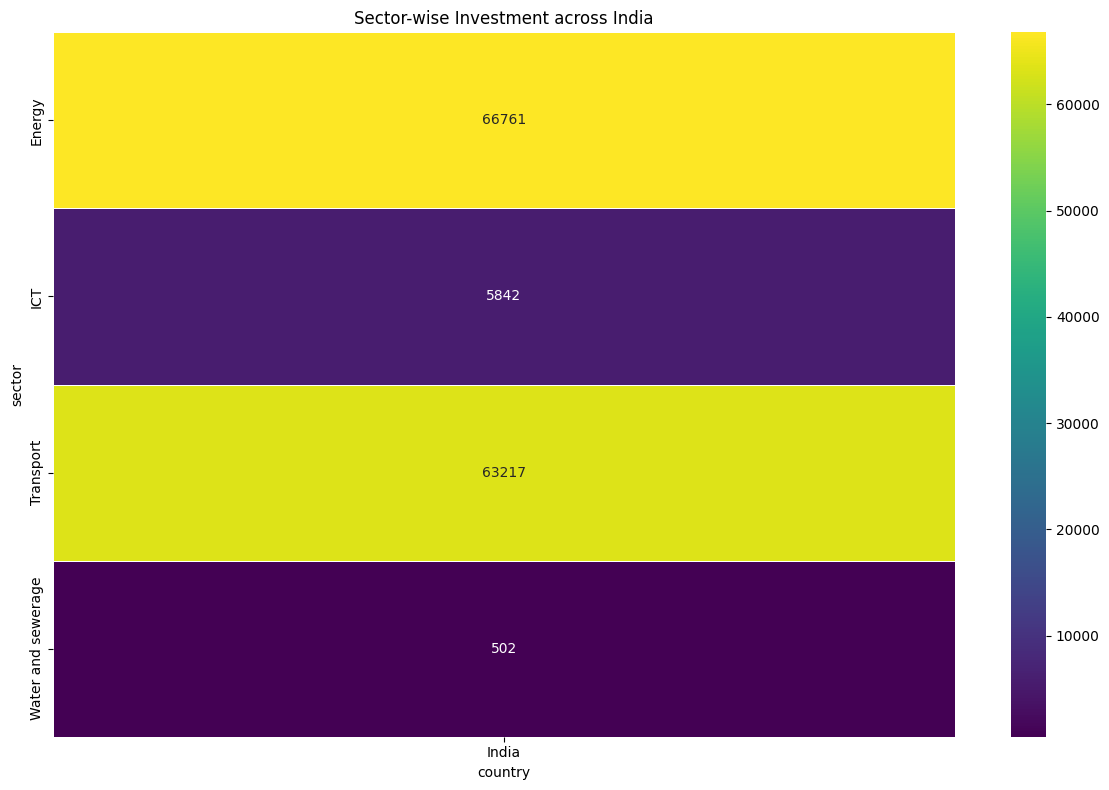

In [ ]:
pivot_sector_country = df.pivot_table(values='investment_real', index='sector', columns='country', aggfunc='sum').fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_sector_country, cmap="viridis", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Sector-wise Investment across India")
plt.tight_layout()
plt.show()

<ipython-input-6-2dfa49e2b245>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='type', order=df['type'].value_counts().index, palette='Set2')


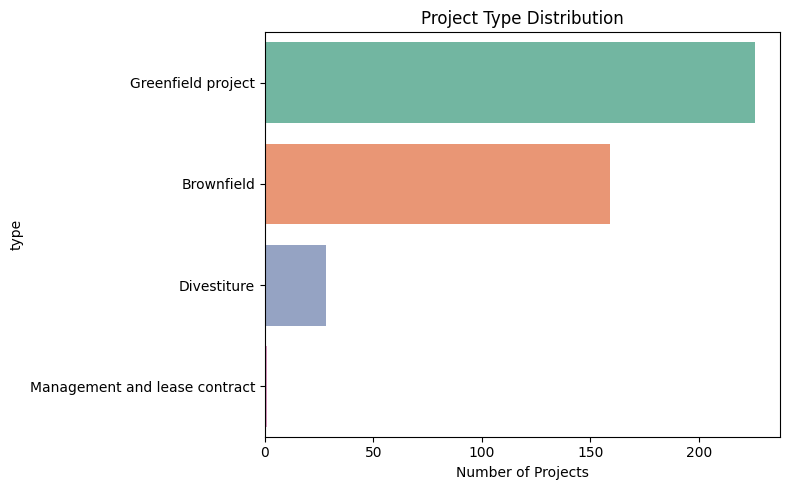

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='type', order=df['type'].value_counts().index, palette='Set2')
plt.title("Project Type Distribution")
plt.xlabel("Number of Projects")
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'IY', 'country', 'Region', 'income', 'IDA', 'FCY',
       'FCM', 'type', 'stype', 'status_n', 'sector', 'ssector', 'Segment',
       'period', 'GGC', 'VDGS', 'TIGS', 'VIGS', 'private', 'fees', 'physical',
       'investment', 'capacity', 'pcapacity', 'technol', 'bid_crit', 'CAM',
       'numberb', 'SponsorCountries', 'PRS', 'OSR', 'Description',
       'FundingYear', 'debt', 'equity', 'c_debt', 'm_debt', 'b_debt', 'i_debt',
       'p_debt', 'intl_debt', 'l_debt', 'UP', 'PublicDisclosure',
       'RenewableConventional', 'bordercountries', 'shareborder', 'GDP',
       'CPI2020', 'realphysicalassets', 'realfeestogovernment',
       'investment_real', 'name', 'Renewables', 'MLS', 'BS', 'PPP',
       'region_str'],
      dtype='object')

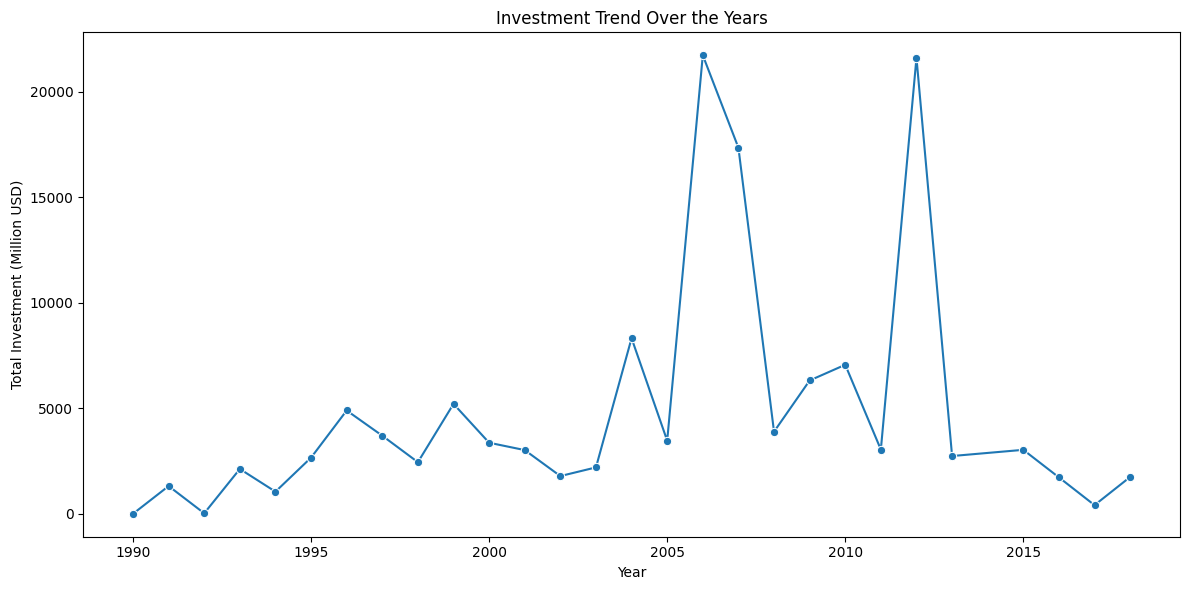

In [ ]:
plt.figure(figsize=(12,6))
yearly_investment = df.groupby('IY')['investment_real'].sum()
sns.lineplot(x=yearly_investment.index, y=yearly_investment.values, marker='o')
plt.title("Investment Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Investment (Million USD)")
plt.tight_layout()
plt.show()


In [ ]:
# Count unique projects (if ID is unique per project)
print("Total number of projects:", df['ID'].nunique())


Total number of projects: 391


<Axes: xlabel='Segment', ylabel='Count'>

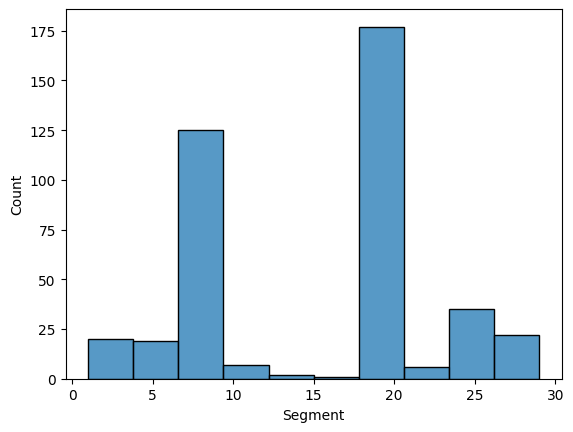

In [ ]:
segment=df['Segment']

sns.histplot(df,
    x = 'Segment',
    bins = 10)

<Axes: xlabel='private', ylabel='Count'>

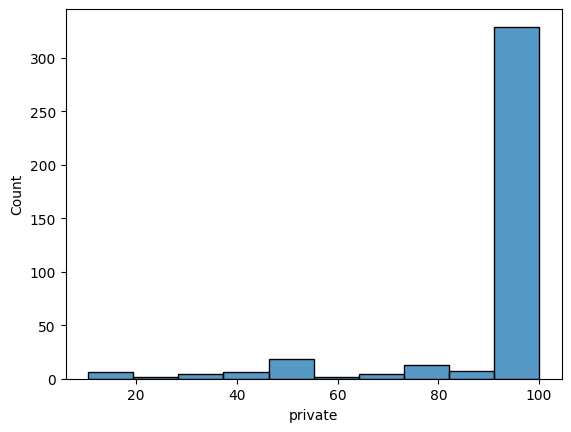

In [ ]:
private_partcipation=df['private']

sns.histplot(df,
    x = 'private',
    bins = 10)

<Axes: xlabel='GDP', ylabel='Count'>

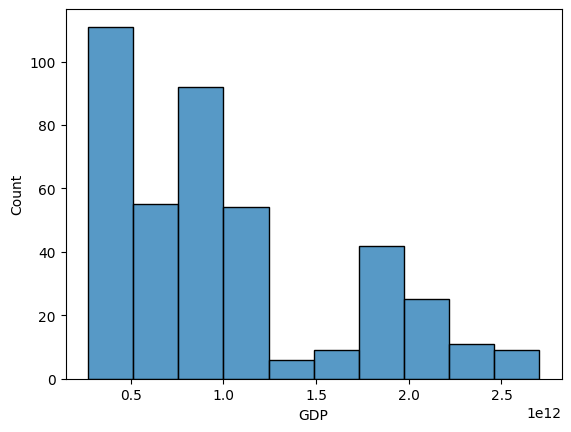

In [ ]:
gdp=df['GDP']

sns.histplot(df,
    x = 'GDP',
    bins = 10)

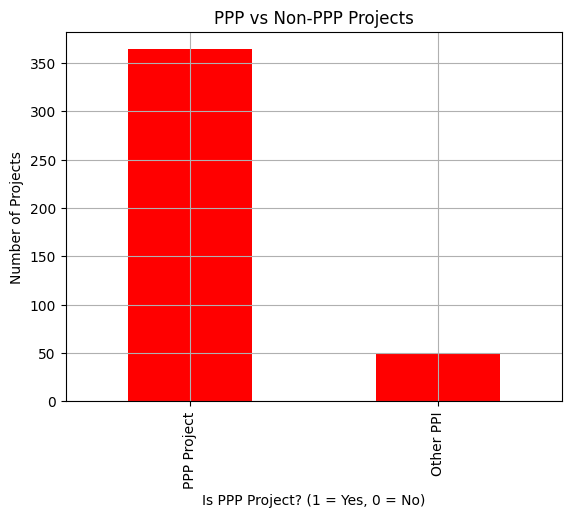

In [ ]:
# Count public/private/PPP from 'PPP' column
df['PPP'] = df['PPP'].astype(str)  # ensure it's string

# If 1 = PPP project
ppp_counts = df['PPP'].value_counts()

ppp_counts.plot(kind='bar', title='PPP vs Non-PPP Projects',color='red')
plt.xlabel('Is PPP Project? (1 = Yes, 0 = No)')
plt.ylabel('Number of Projects')
plt.grid(True)
plt.show()


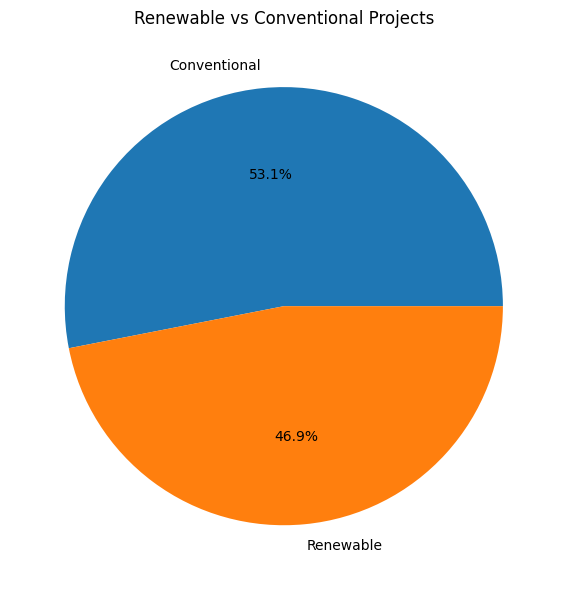

In [ ]:
renewable_counts = df['RenewableConventional'].value_counts()

plt.figure(figsize=(6, 6))
renewable_counts.plot(kind='pie', autopct='%1.1f%%', title='Renewable vs Conventional Projects')
plt.ylabel('')
plt.tight_layout()


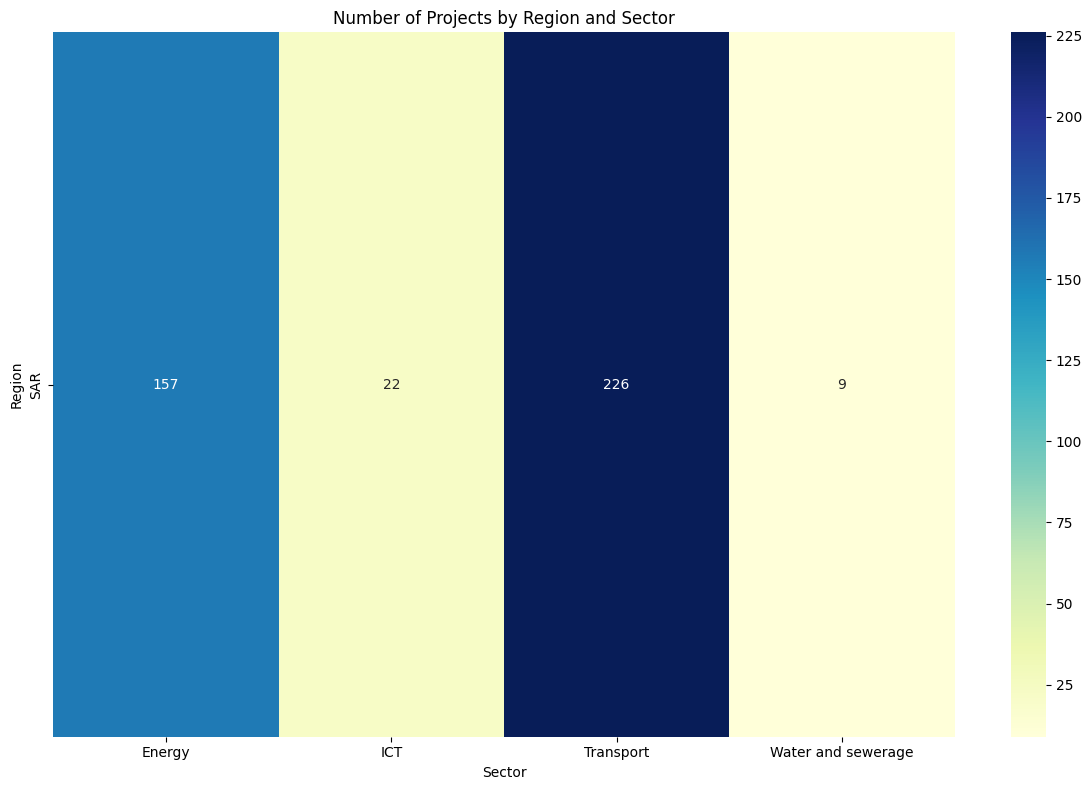

In [ ]:
heatmap_data = df.pivot_table(index='Region', columns='sector', values='ID', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Projects by Region and Sector')
plt.xlabel('Sector')
plt.ylabel('Region')
plt.tight_layout()

In [ ]:
df['SponsorCountries'].nunique()

52

) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


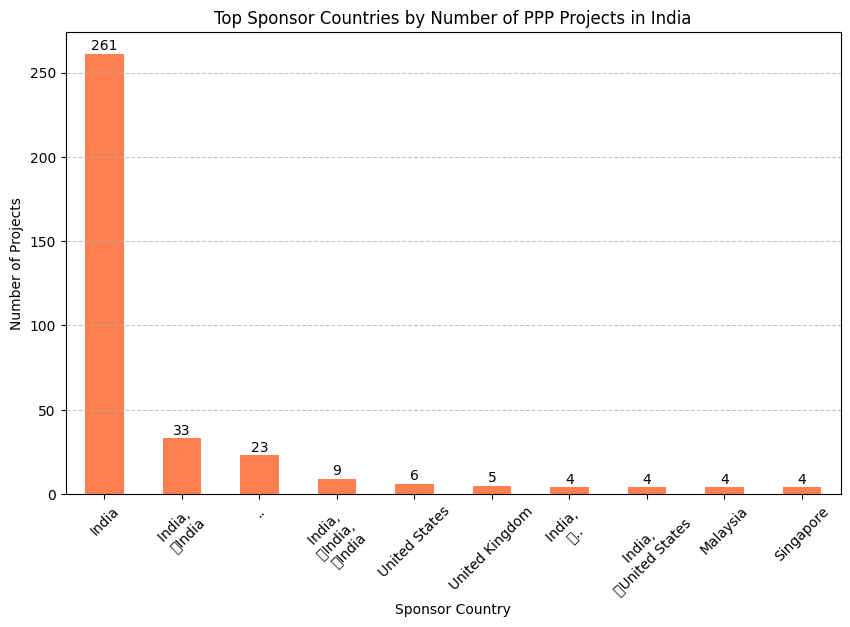

In [ ]:
# Count number of projects per sponsor country
sponsor_counts = df['SponsorCountries'].value_counts().head(10)  # Top 10 sponsor countries

# Plot
plt.figure(figsize=(10, 6))
sponsor_counts.plot(kind='bar', color='coral')
plt.title('Top Sponsor Countries by Number of PPP Projects in India')
plt.xlabel('Sponsor Country')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of bars
for i, value in enumerate(sponsor_counts):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)


In [ ]:
import re
def clean_sponsor_country(country):
    if pd.isnull(country) or country.strip() == '..':
        return "Others"
    # Remove emojis and special characters
    country = re.sub(r'[^\w,\s]', '', country)
    # If multiple countries, pick the first one
    country = country.split(',')[0].strip()
    # Standardize common variations
    if "india" in country.lower():
        return "India"
    elif "united states" in country.lower():
        return "United States"
    elif "united kingdom" in country.lower() or "uk" in country.lower():
        return "United Kingdom"
    elif "malaysia" in country.lower():
        return "Malaysia"
    elif "france" in country.lower():
        return "France"
    elif "singapore" in country.lower():
        return "Singapore"
    elif "japan" in country.lower():
        return "Japan"
    elif "china" in country.lower():
        return "China"
    elif "spain" in country.lower():
        return "Spain"
    elif "canada" in country.lower():
        return "Canada"
    else:
        return country


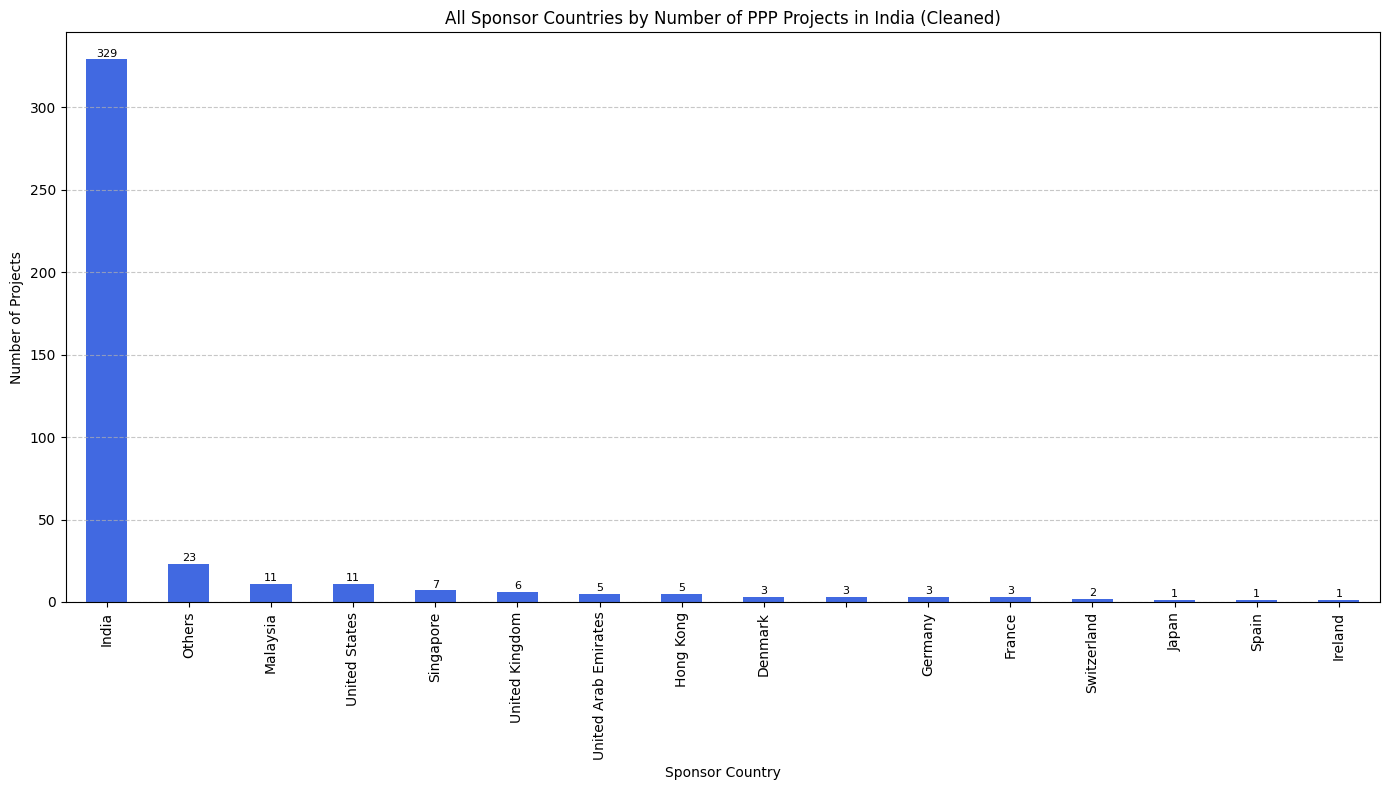

✅ Cleaned List of Sponsor Countries:
Cleaned_Sponsor_Country
India                   329
Others                   23
Malaysia                 11
United States            11
Singapore                 7
United Kingdom            6
United Arab Emirates      5
Hong Kong                 5
Denmark                   3
                          3
Germany                   3
France                    3
Switzerland               2
Japan                     1
Spain                     1
Ireland                   1
Name: count, dtype: int64


In [ ]:
#Apply the cleaning
df['Cleaned_Sponsor_Country'] = df['SponsorCountries'].apply(clean_sponsor_country)

# Step 4: Count number of projects for ALL sponsor countries
sponsor_counts = df['Cleaned_Sponsor_Country'].value_counts().dropna()

# Step 5: Plot (All countries)
plt.figure(figsize=(14, 8))
sponsor_counts.plot(kind='bar', color='royalblue')
plt.title('All Sponsor Countries by Number of PPP Projects in India (Cleaned)')
plt.xlabel('Sponsor Country')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of bars
for i, value in enumerate(sponsor_counts):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Step 6: (Optional) Print cleaned list
print("✅ Cleaned List of Sponsor Countries:")
print(sponsor_counts)

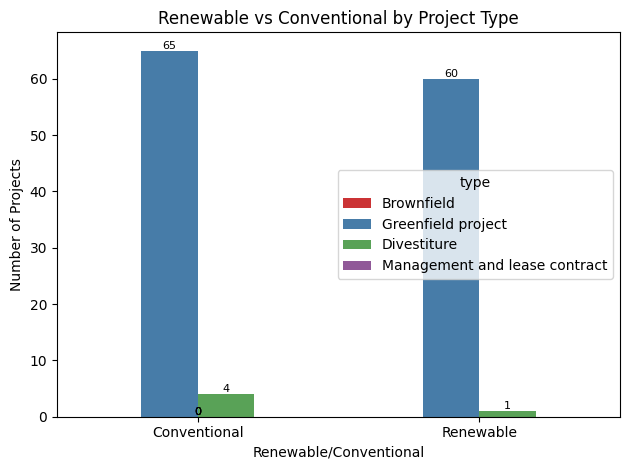

In [ ]:
sns.countplot(data=df, x='RenewableConventional', hue='type', palette='Set1')
plt.title("Renewable vs Conventional by Project Type")
plt.xlabel("Renewable/Conventional")
plt.ylabel("Number of Projects")
plt.tight_layout()

# Get the counts for each bar
ax = plt.gca() # Get current axes
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()),
            ha='center', va='bottom', fontsize=8)
plt.show()

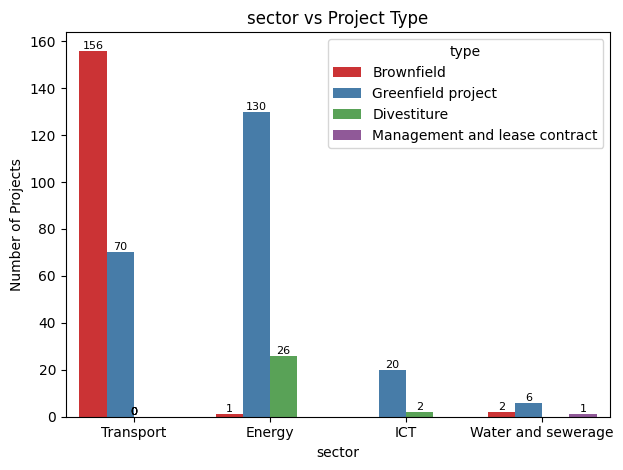

In [ ]:
sns.countplot(data=df, x='sector', hue='type', palette='Set1')
plt.title("sector vs Project Type")
plt.xlabel("sector")
plt.ylabel("Number of Projects")
plt.tight_layout()
ax = plt.gca() # Get current axes
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()),
            ha='center', va='bottom', fontsize=8)

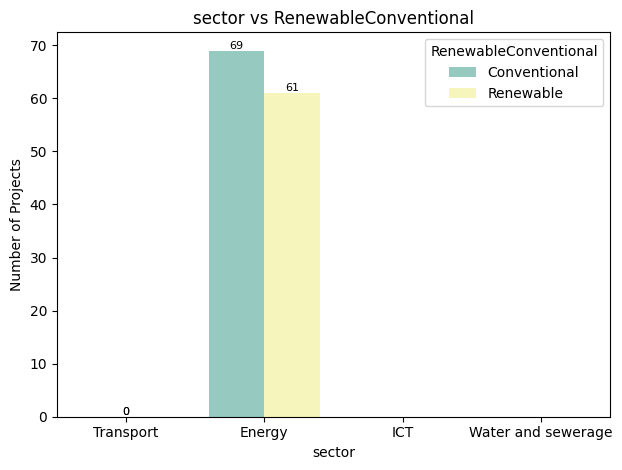

In [ ]:
sns.countplot(data=df, x='sector', hue='RenewableConventional', palette='Set3')
plt.title("sector vs RenewableConventional")
plt.xlabel("sector")
plt.ylabel("Number of Projects")
plt.tight_layout()
ax = plt.gca() # Get current axes
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()),
            ha='center', va='bottom', fontsize=8)

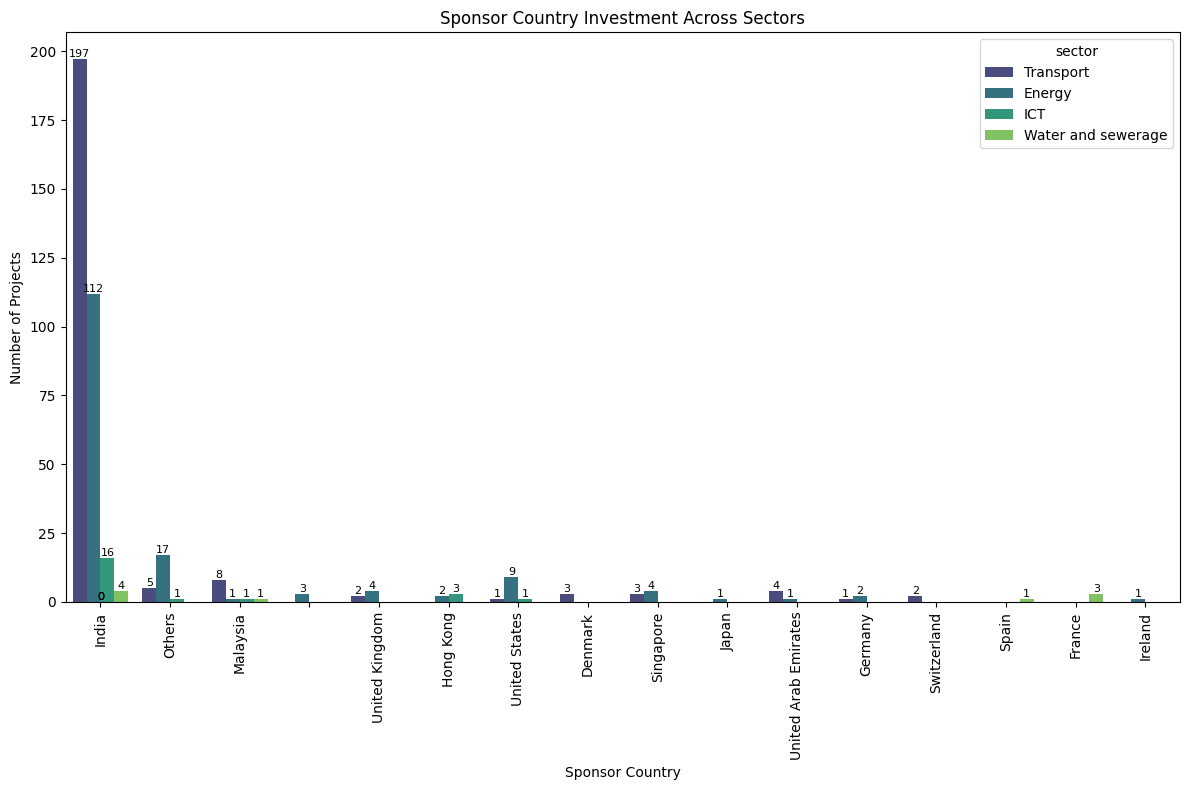

In [ ]:

plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.countplot(data=df, x='Cleaned_Sponsor_Country', hue='sector', palette='viridis')
plt.title("Sponsor Country Investment Across Sectors")
plt.xlabel("Sponsor Country")
plt.ylabel("Number of Projects")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
ax = plt.gca() # Get current axes
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()),
            ha='center', va='bottom', fontsize=8)
plt.show()

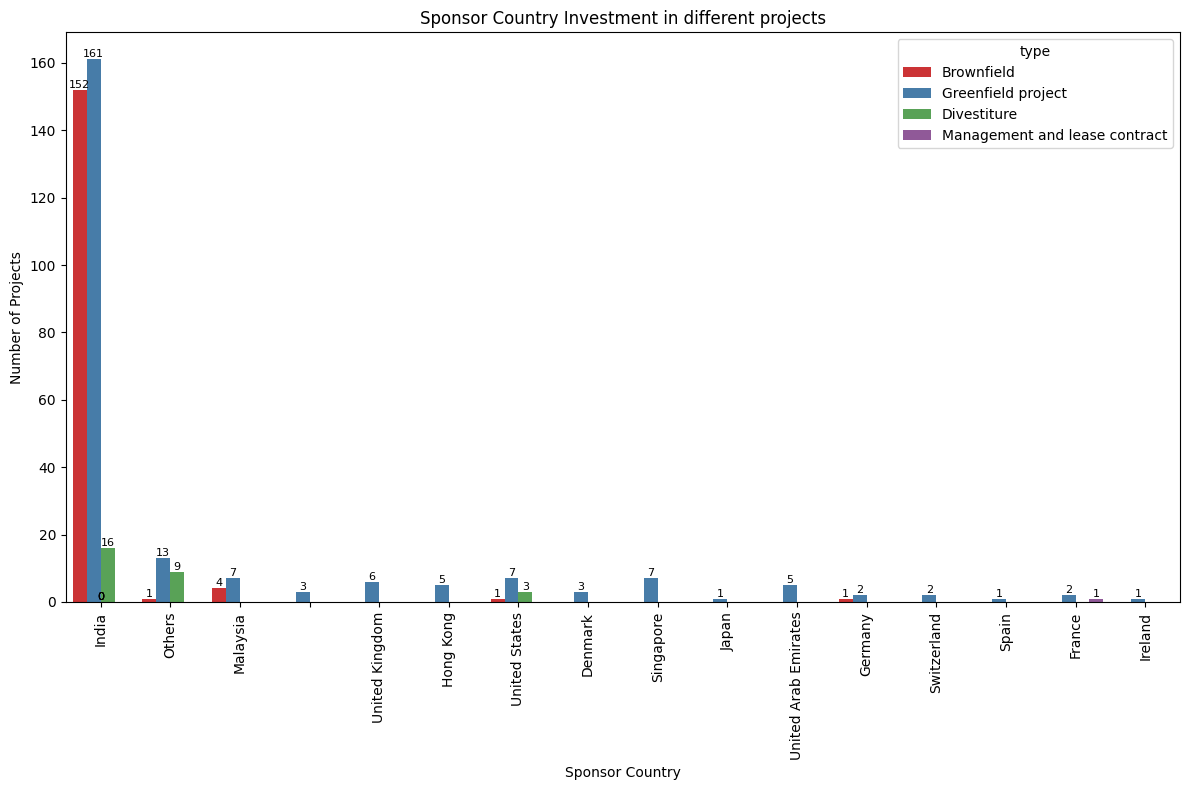

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.countplot(data=df, x='Cleaned_Sponsor_Country', hue='type', palette='Set1')
plt.title("Sponsor Country Investment in different projects")
plt.xlabel("Sponsor Country")
plt.ylabel("Number of Projects")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
ax = plt.gca() # Get current axes
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()),
            ha='center', va='bottom', fontsize=8)
plt.show()

<ipython-input-27-d29d13b683c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivot_sector_country.reset_index(), x='sector', y='India', palette="viridis", edgecolor='black') # Assuming 'India' is one of your countries


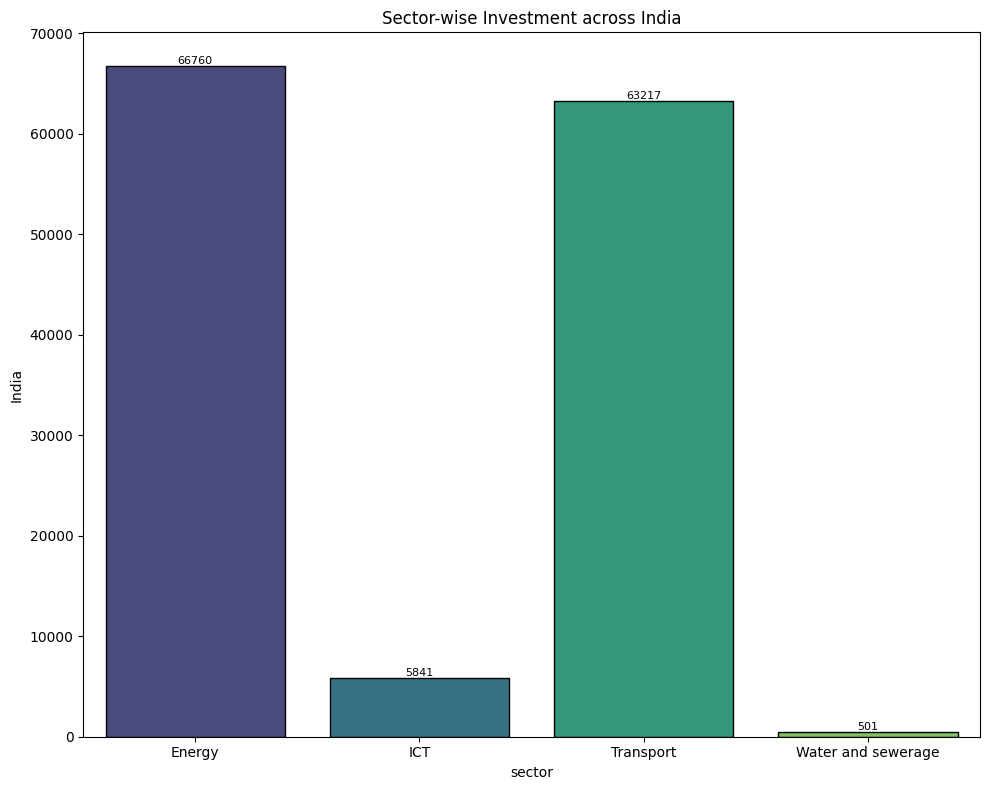

In [ ]:
pivot_sector_country = df.pivot_table(values='investment_real', index='sector', columns='country', aggfunc='sum').fillna(0)
plt.figure(figsize=(10,8))
# Removed cmap and added palette="viridis"
# The linewidths parameter is not supported in sns.barplot. Instead, you can use edgecolor to set the color of the edges.
# If you want to change the width of the edges, you might need to loop through the patches and set the linewidth individually.
sns.barplot(data=pivot_sector_country.reset_index(), x='sector', y='India', palette="viridis", edgecolor='black') # Assuming 'India' is one of your countries
plt.title("Sector-wise Investment across India")
plt.tight_layout()
ax = plt.gca() # Get current axes
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()),
            ha='center', va='bottom', fontsize=8)
plt.show()

<Figure size 1200x700 with 0 Axes>

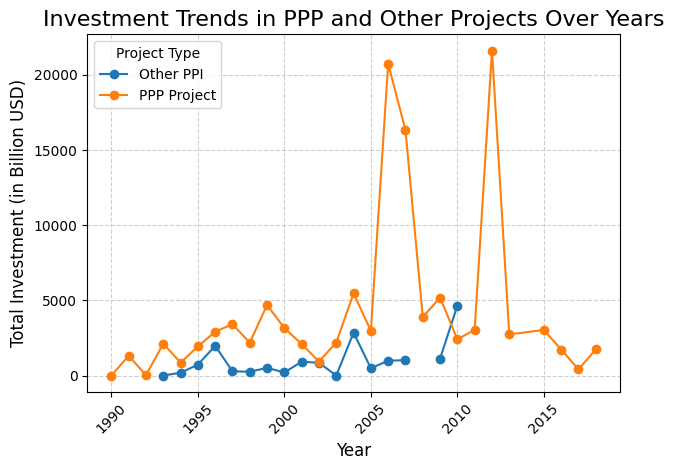

In [ ]:
investment_trend = df.groupby(['IY', 'PPP'])['investment_real'].sum().reset_index()

# Step 4: Pivot the data to plot easily
pivot_trend = investment_trend.pivot(index='IY', columns='PPP', values='investment_real')

# Step 5: Plot
plt.figure(figsize=(12, 7))

pivot_trend.plot(marker='o')

plt.title('Investment Trends in PPP and Other Projects Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Investment (in Billion USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(title='Project Type')
plt.tight_layout()

plt.show()